# _`context`_.`levenshtein`

Generate a transducer encoding the Levenshtein distance for two alphabets.

The resulting transducer can be composed with transducers representing two languages to compute the distance between the two languages (among other things, like the edit-distance automaton).

Preconditions:
- the labelset has exactly two tapes
- the labelsets must have the empty word
- the weightset must be `nmin` ($\langle \mathbb{N}, \min, +\rangle$)

References:
  - [mohri.2002.ciaa](References.ipynb#mohri.2002.ciaa) for more details on the edit-distance automaton

## Examples

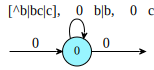

In [1]:
import vcsn
c = vcsn.context('[abc] x [bce] -> Nmin')
l = c.levenshtein()
l

The Levenshtein automaton only has one state, but has $n^2$ transitions, for a common alphabet between tapes of size $n$.

To show its use, we will create automata for two languages, `a1` and `a2`, and compute the edit-distance automaton.

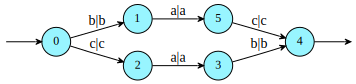

In [2]:
a1 = vcsn.context('[abc]').expression("bac+cab").derived_term().strip().partial_identity()
a1

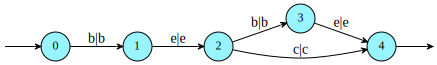

In [3]:
a2 = vcsn.context('[bce]').expression("bec+bebe").automaton().cominimize().strip().partial_identity()
a2

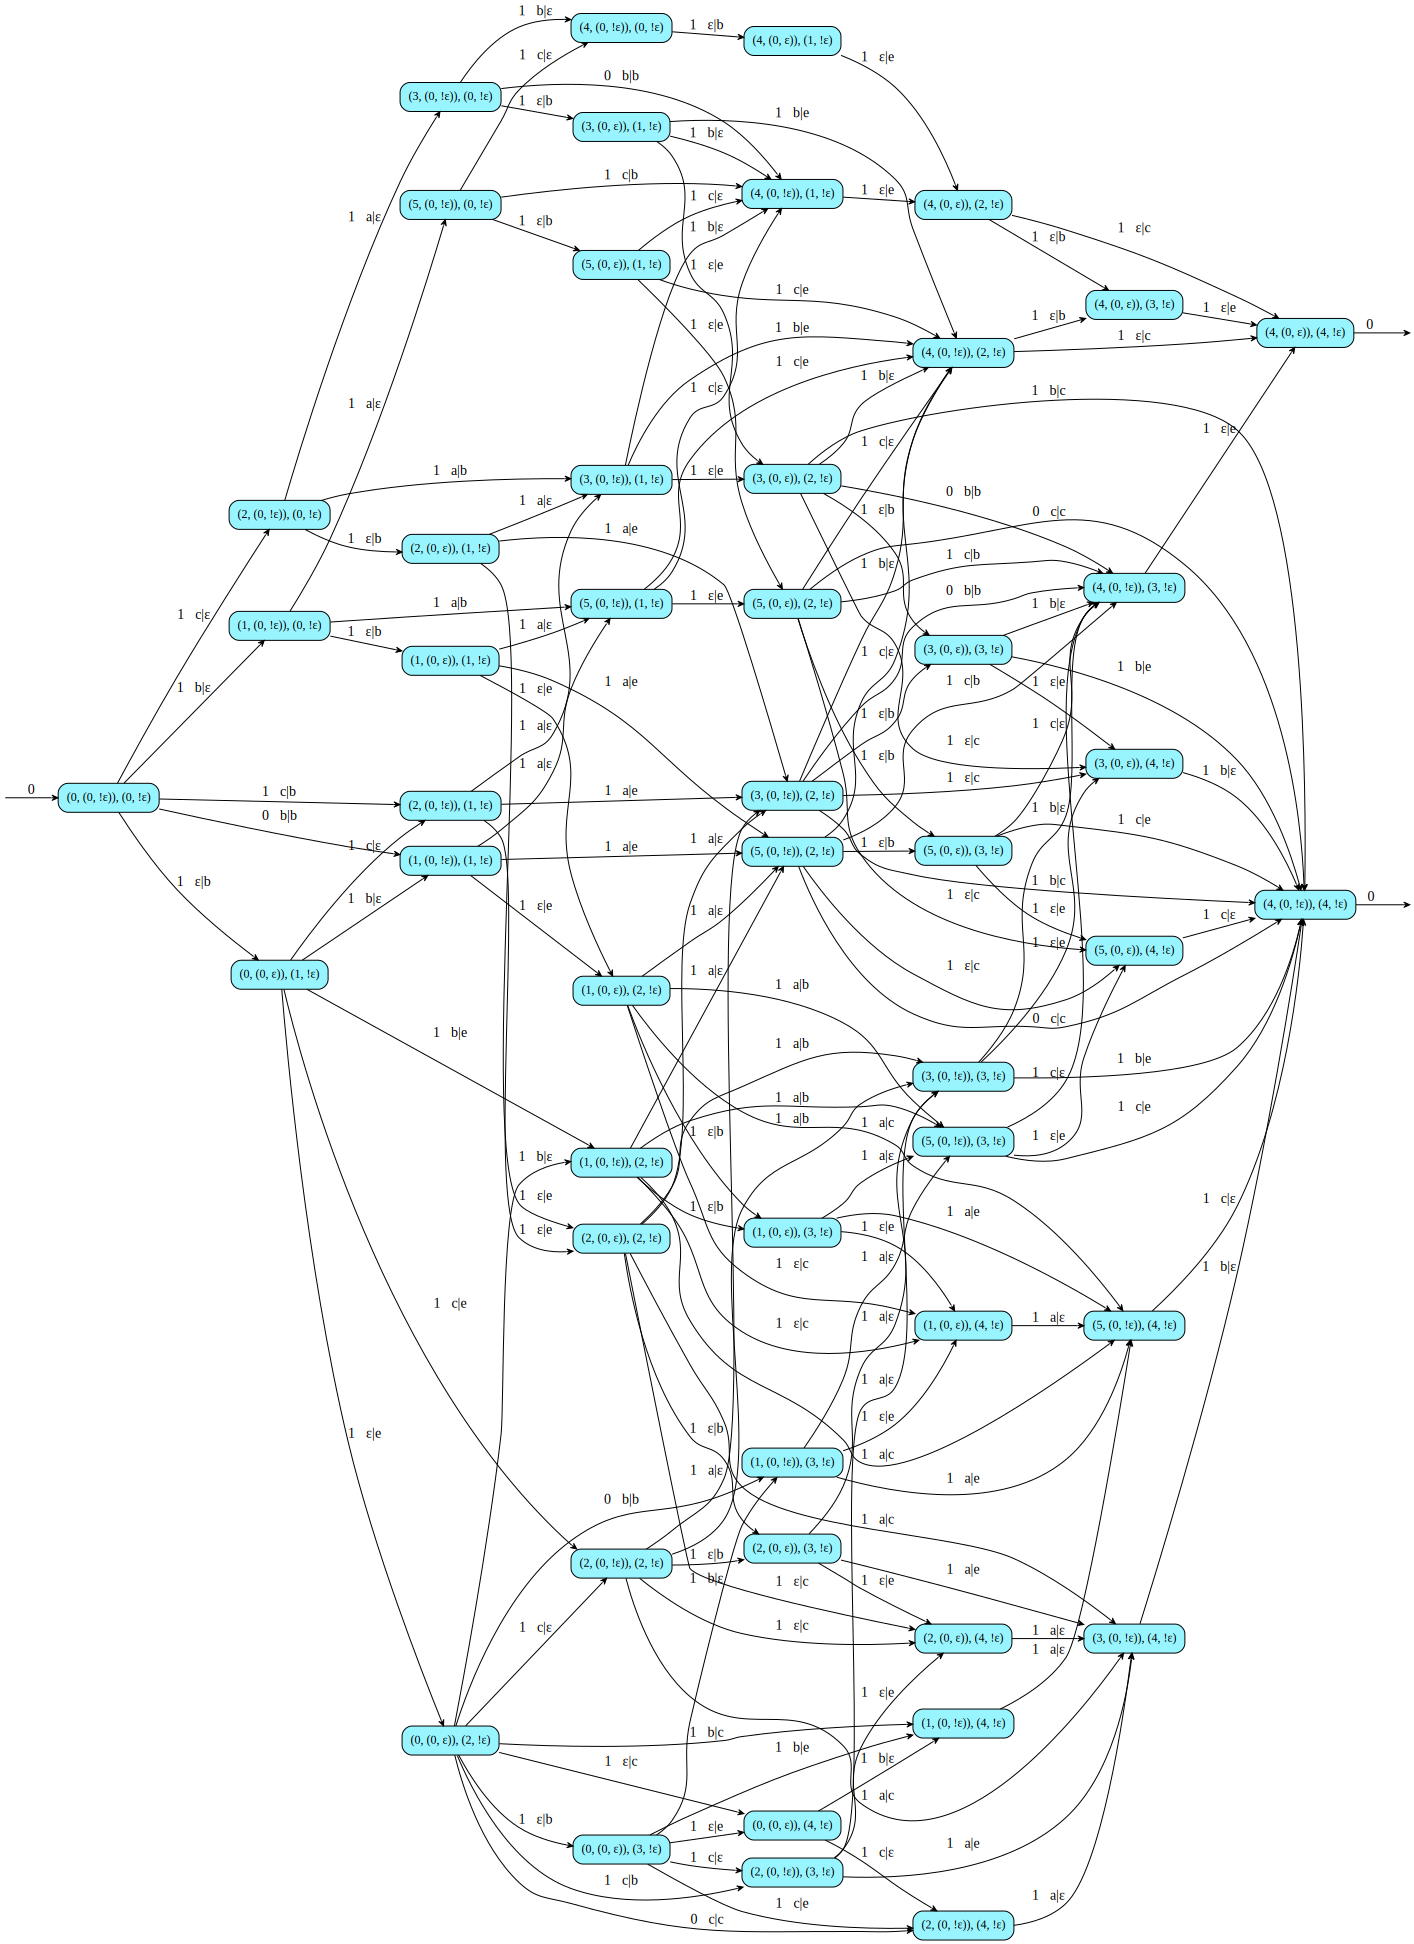

In [4]:
edit = a1.compose(l).compose(a2).trim()
edit

The automaton can be evaluated on one tape to get the edit distance between a word and a language.

In [5]:
exp = edit.lift(1).proper().evaluate("bac")
exp

⟨3⟩((b)(e)(b)(e))+⟨1⟩((b)(e)(c+⟨2⟩((b)(e))))+⟨2⟩((b)(e)(⟨1⟩(c)+⟨2⟩((b)(e))))+⟨1⟩(⟨3⟩((b)(e)(b)(e))+⟨1⟩((b)(e)(⟨1⟩(c)+⟨2⟩((b)(e)))))

In [6]:
vcsn.context("[bce], nmin").expression(exp.format('text'), 'distributive')

⟨1⟩(bec)+⟨3⟩(bebe)